In [1]:
import os
import sklearn
import requests
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump,load
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
MalwareDataset = pd.read_csv('CleanedDatasetFinal.csv',sep='|')
Legit = MalwareDataset[0:3787].drop(['legitimate'], axis=1)
Malware = MalwareDataset[3787::].drop(['legitimate'], axis=1)

To make sure that the dataset has loaded properly, let's print the number of important features:

In [2]:
print('The shape of the malware dataset is: %s samples, %s features \n'%(Legit.shape[0], Legit.shape[1]))
print("The shape of the malware dataset is: %s samples, %s features"%(Malware.shape[0], Malware.shape[1]))

The shape of the malware dataset is: 3787 samples, 17 features 

The shape of the malware dataset is: 11360 samples, 17 features


In [3]:
#What are  the features that define data as legit or malware
print(MalwareDataset.columns)

Index(['Name', 'md5', 'Machine', 'SectionsMeanEntropy', 'SectionsMinEntropy',
       'SectionsMaxEntropy', 'SectionsMeanRawsize', 'SectionsMinRawsize',
       'SectionMaxRawsize', 'ResourcesNb', 'ResourcesMeanEntropy',
       'ResourcesMinEntropy', 'ResourcesMaxEntropy', 'ResourcesMeanSize',
       'ResourcesMinSize', 'ResourcesMaxSize', 'VersionInformationSize',
       'legitimate'],
      dtype='object')


To improve the estimators' accuracy scores, we are going to use the sklearn.feature_selection module. This module is used in feature selection or dimensionality reduction in the dataset.
To compute the features' importance, in our case, we are going to use tree-based feature selection. Load the sklearn.feature_selection module: 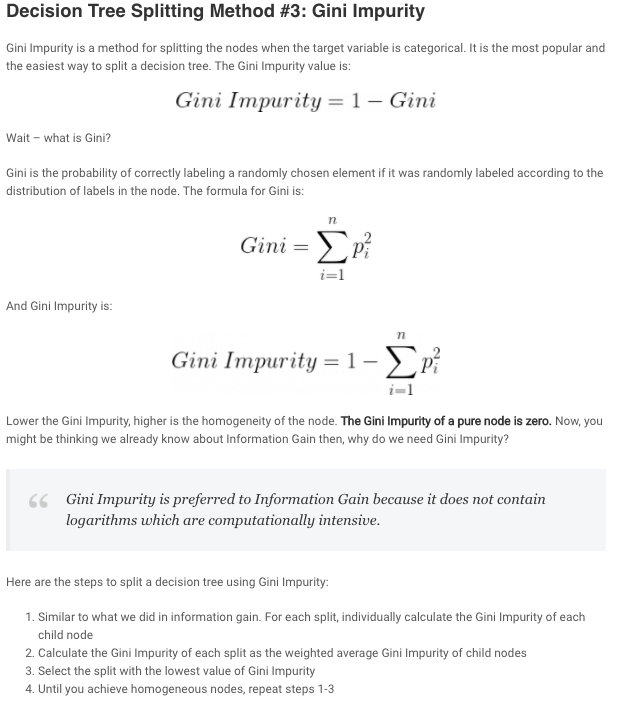

In [4]:
Data = MalwareDataset.drop(['Name', 'md5', 'legitimate'], axis=1).values
Target = MalwareDataset['legitimate'].values
FeatSelect =  sklearn.ensemble.ExtraTreesClassifier().fit(Data, Target)
Model = SelectFromModel(FeatSelect, prefit=True)
Data_new = Model.transform(Data)
print(Target)
print(FeatSelect)
print(Model)
print (Data.shape)
print (Data_new.shape)

[1 1 1 ... 0 0 0]
ExtraTreesClassifier()
SelectFromModel(estimator=ExtraTreesClassifier(), prefit=True)
(15147, 15)
(15147, 6)


The most important features are as follows: 

In [5]:
Features = Data_new.shape[1]
Index = np.argsort(ExtraTreesClassifier().fit(Data,Target).feature_importances_)[::-1][:Features]
for feat  in range(Features):
    print("%d"%(feat+1),MalwareDataset.columns[2+Index[feat]])

1 ResourcesMinSize
2 VersionInformationSize
3 SectionsMaxEntropy
4 SectionsMinEntropy
5 ResourcesMeanEntropy
6 ResourcesMeanSize


Now, it is time to train our model with a random forest classifier. Don't forget to split the dataset, like we learned previously: 

In [6]:
Classifiers = { "RandomForest": RandomForestClassifier(n_estimators=50), 
               "GradientBoosting": GradientBoostingClassifier(n_estimators=50), 
               "AdaBoost": AdaBoostClassifier(n_estimators=100),}
Legit_Train, Legit_Test, Malware_Train, Malware_Test = train_test_split(Data_new, Target ,test_size=0.2)
#Creating empty list for the json response
responseListBengin= []
responseListMal= []
#Looping through the classifier Dict
for Classif in Classifiers:
    clf = Classifiers[Classif]
    # Saving the Classifier
    if Classif == "RandomForest":
        dump(clf, 'Classifier/RandomForest.joblib')
    elif Classif =="GradientBoosting":
        dump(clf, 'Classifier/GradientBoosting.joblib')
    elif Classif =="AdaBoost":
        dump(clf, 'Classifier/AdaBoost.joblib')  
    else:
        print("Classifier will doesn't exist") 

RandomForestClassifier(n_estimators=50) : 99.768977 %
False positive rate : 0.000000 %
False negative rate : 0.912647 %
Precision: 100.0 %
Recall: 99.08735332464146 %


/Users/kipsangjacob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


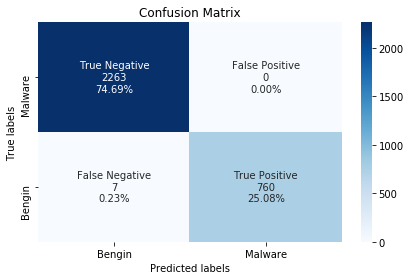

(array([ 253,  267,  447,  573, 2730, 2799, 3022]),)
The Average detection rate for VirusTotal API of a Malicious File Cannot divide by zero.
The Average detection rate for VirusTotal API of a Bengin File is 94.32485322896282 %
GradientBoostingClassifier(n_estimators=50) : 99.702970 %
False positive rate : 0.088378 %
False negative rate : 0.912647 %
Precision: 99.73753280839895 %
Recall: 99.08735332464146 %


/Users/kipsangjacob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


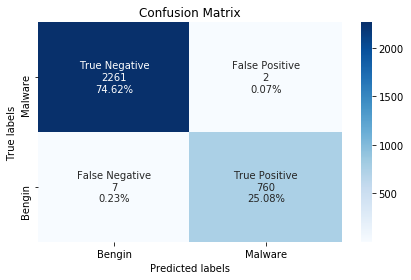

(array([ 253,  267,  447,  573, 1788, 2429, 2730, 2799, 3022]),)
The Average detection rate for VirusTotal API of a Malicious File Cannot divide by zero.
The Average detection rate for VirusTotal API of a Bengin File is 94.6917808219178 %
AdaBoostClassifier(n_estimators=100) : 99.768977 %
False positive rate : 0.044189 %
False negative rate : 0.782269 %
Precision: 99.86876640419948 %
Recall: 99.21773142112124 %


/Users/kipsangjacob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


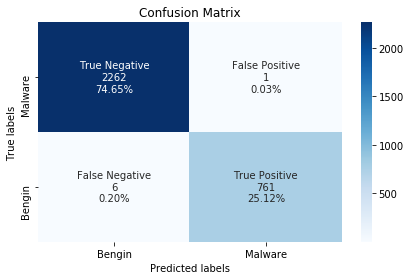

(array([ 267,  447,  573, 1533, 2730, 2799, 3022]),)
The Average detection rate for VirusTotal API of a Malicious File Cannot divide by zero.
The Average detection rate for VirusTotal API of a Bengin File is 95.0565812983919 %


In [7]:
#Loading the Classifier
directory='Classifier/'
for filename in os.listdir(directory):
    path = ('Classifier/'+filename)
    clf = load(path) 
    clf.fit(Legit_Train,Malware_Train)
    score = clf.score(Legit_Test, Malware_Test)
    print("%s : %f %%" % (clf, score*100))
    Result = clf.predict(Legit_Test)
    Conf_mat = confusion_matrix(Malware_Test, Result)
    print("False positive rate : %f %%" % 
          ((Conf_mat[0][1] / float(sum(Conf_mat[0])))*100)) 
    print('False negative rate : %f %%' % 
          ( (Conf_mat[1][0] / float(sum(Conf_mat[1]))*100)))
    print('Precision:',float((Conf_mat[1][1]/(Conf_mat[0][1]+Conf_mat[1][1]))*100),"%")
    print('Recall:',float((Conf_mat[1][1]/(Conf_mat[1][1]+Conf_mat[1][0]))*100),"%")
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in
                    Conf_mat.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         Conf_mat.flatten()/np.sum(Conf_mat)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(Conf_mat, annot=labels, fmt='', cmap='Blues')
    # labels, title and ticks
    ax= plt.subplot()
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Bengin', 'Malware'])
    ax.yaxis.set_ticklabels(['Malware', 'Bengin'])
    plt.tight_layout()
    plt.show()
    misclassified = np.where(Result != Malware_Test)
    print(misclassified)
    for rowindex in misclassified:
        md5hash = MalwareDataset.iloc[(rowindex),1]
        #looping through the md5hash for Misclassfied files.
        for row in md5hash:
            url = 'https://www.virustotal.com/vtapi/v2/file/report'
            params = {'apikey': 
                      'apikey-value', 
                      'resource': row}
            response = requests.get(url, params=params)
            #Checking if a md5 hash of file is bengin or malicious
            if response.json().get('positives')!=None:
                if response.json().get('positives')>0:
                    responseListMal.append(float((response.json().get('total')/73)*100))
                else:
                    responseListBengin.append(float((response.json().get('total')/73)*100))
    if len(responseListMal) or len(responseListBengin)!=0:
        try:
            #Calculating the average detectionrate of VirusTotal API of a Malicious File
            averageDetectionRate = sum(responseListMal)/len(responseListMal)
            print("The Average detection rate for VirusTotal API of a Malicious File is",averageDetectionRate,"%")
        except ZeroDivisionError:
            print('The Average detection rate for VirusTotal API of a Malicious File Cannot divide by zero.')
        try:
            #Calculating the average detectionrate of VirusTotal API of a Bengin File
            averageDetectionRate = sum(responseListBengin)/len(responseListBengin)
            print("The Average detection rate for VirusTotal API of a Bengin File is",averageDetectionRate,"%") 
        except ZeroDivisionError:
            print('The Average detection rate for VirusTotal API of a Bengin File Cannot divide by zero.')

    else:
        print("There is no VirusTotal API detection for Begnin or Malware")

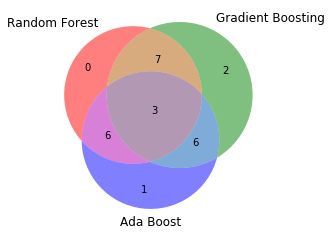

In [6]:
#Cleaned Dataset.
from matplotlib_venn import venn3, venn3_circles
#from matplotlib import pyplot as plt
venn3(subsets = (0, 2, 7, 1, 6, 6, 3), set_labels = ('Random Forest', 'Gradient Boosting', 'Ada Boost'), alpha = 0.5);